# RSJ model: CPR of $I(\phi)=[\sin(\phi)+\eta\sin(2\phi)]+A(\sin(\phi+C)+\eta\sin[2(\phi+C)])$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from scipy.integrate import odeint
from scipy.optimize import fmin
from scipy.io import savemat

In [2]:
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'\usepackage[utf8]{inputenc}',
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [3]:
%matplotlib inline

In [4]:
%load_ext Cython

In [5]:
h=6.626e-34
hbar=h/2/np.pi
Qe=1.608e-19

In [6]:
%%cython
cimport numpy as np
from libc.math cimport sin, cos, atanh,pi
import numpy as np

h=6.626e-34
hbar=h/2/pi
Qe=1.608e-19
Ic=2e-6
Rn=13
cpdef double CPR(double G, double A, double eta, double C):
    '''
        Current-phase relationship for the junction
    '''
    return sin(G)+eta*sin(2*G)+A*sin(G+C)+A*eta*sin(2*G+2*C)
    
cpdef double dGdt(G,double t,double I,double A, double eta,double C):
    '''
        Define y = [gamma]
        dy_dt =  - f(gamma) + i(t)) 
    '''
    der = 2*Qe*Rn*(I-Ic*CPR(G,A,eta,C))/hbar
    return der 


## Load Data and Plot

In [7]:
import sys
#sys.path.insert(0, 'C:/Users/QMDla/Documents/GitHub/data_file_manipulations/')
sys.path.insert(0, '/Volumes/GoogleDrive/My Drive/GitHub/data_file_manipulations/')
import files_manipulation

In [8]:
import importlib

In [9]:
importlib.reload(files_manipulation)

<module 'files_manipulation' from '/Volumes/GoogleDrive/My Drive/GitHub/data_file_manipulations/files_manipulation.py'>

In [10]:
dataDir = "./"
files_manipulation.merge_multiple_mat(dataDir,True) # True for saving .h5


IDC.shape=(800,)
C.shape=(41,)
V.shape=(41, 800, 16)
DVDI.shape=(41, 800, 16)
eta.shape=(16,)
A.shape=(16,)
noise_std.shape=(16,)


### Load hdf5

In [7]:
import h5py

In [8]:
fd2= h5py.File('noise_0p002/merged.h5','r')
fd4= h5py.File('noise_0p004/merged.h5','r')
fd5= h5py.File('noise_0p005/merged.h5','r')
fd7= h5py.File('noise_0p007/merged.h5','r')
fd9= h5py.File('noise_0p009/merged.h5','r')

In [9]:
list(fd2.keys())

['A',
 'C',
 'DVDI',
 'IDC',
 'Icn',
 'Icp',
 'V',
 'eta',
 'noise_std',
 'peak_n',
 'peak_p']

In [90]:
A=fd2['A'][...]
print(A.shape)
C=fd2['C'][...]
print(C.shape)
eta=fd2['eta'][...]
print(eta.shape)
IDC=fd2['IDC'][...]
print(IDC.shape)

(16,)
(41,)
(16,)
(800,)


In [91]:
DVDI=fd2['DVDI'][...]
print(DVDI.shape)
V=fd2['V'][...]
print(V.shape)
noise_std=fd2['noise_std'][0]
print(noise_std)
Icn=fd2['Icn'][...]
print(Icn.shape)
Icp=fd2['Icp'][...]
print(Icp.shape)
peak_n=fd2['peak_n'][...]
print(peak_n.shape)
peak_p=fd2['peak_p'][...]
print(peak_p.shape)


(41, 800, 16)
(41, 800, 16)
0.002
(41, 16)
(41, 16)
(41, 16)
(41, 16)


In [92]:
DVDI=np.stack((fd2['DVDI'][...],fd4['DVDI'][...],fd5['DVDI'][...],fd7['DVDI'][...],fd9['DVDI'][...]),axis=-1)
print(DVDI.shape)
V=np.stack((fd2['V'][...],fd4['V'][...],fd5['V'][...],fd7['V'][...],fd9['V'][...]),axis=-1)
print(V.shape)
noise_std=np.stack((fd2['noise_std'][0],fd4['noise_std'][0],fd5['noise_std'][0],fd7['noise_std'][0],fd9['noise_std'][0]),axis=-1)
print(noise_std.shape)
Icn=np.stack((fd2['Icn'][...],fd4['Icn'][...],fd5['Icn'][...],fd7['Icn'][...],fd9['Icn'][...]),axis=-1)
print(Icn.shape)
Icp=np.stack((fd2['Icp'][...],fd4['Icp'][...],fd5['Icp'][...],fd7['Icp'][...],fd9['Icp'][...]),axis=-1)
print(Icp.shape)
peak_n=np.stack((fd2['peak_n'][...],fd4['peak_n'][...],fd5['peak_n'][...],fd7['peak_n'][...],fd9['peak_n'][...]),axis=-1)
print(peak_n.shape)
peak_p=np.stack((fd2['peak_p'][...],fd4['peak_p'][...],fd5['peak_p'][...],fd7['peak_p'][...],fd9['peak_p'][...]),axis=-1)
print(peak_p.shape)

(41, 800, 16, 5)
(41, 800, 16, 5)
(5,)
(41, 16, 5)
(41, 16, 5)
(41, 16, 5)
(41, 16, 5)


In [65]:
print(A)
print(eta)

[0.2 0.2 0.2 0.2 0.4 0.4 0.4 0.4 0.6 0.6 0.6 0.6 0.8 0.8 0.8 0.8]
[0.2 0.4 0.6 0.8 0.2 0.4 0.6 0.8 0.2 0.4 0.6 0.8 0.2 0.4 0.6 0.8]


### Plot all the $R(I_{DC}, C)$ maps

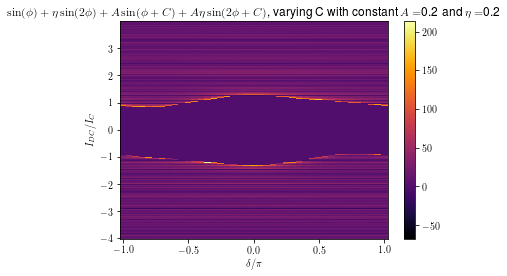

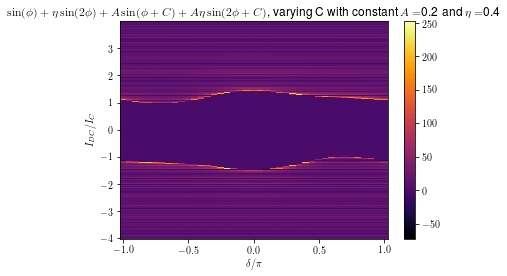

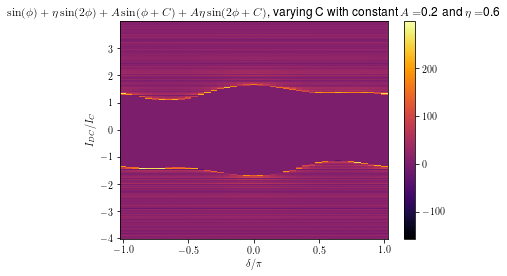

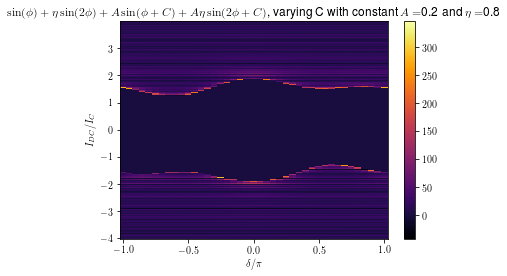

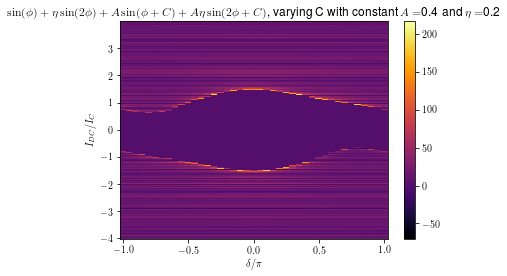

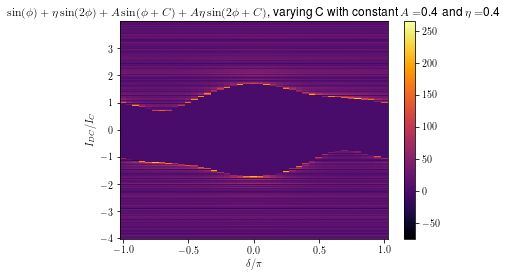

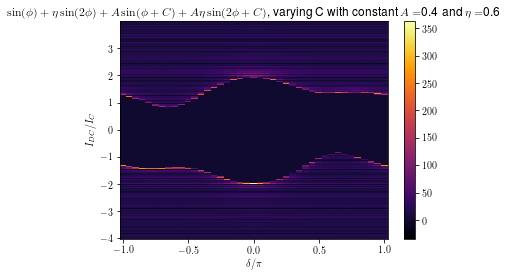

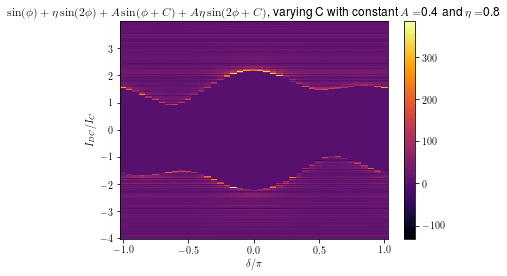

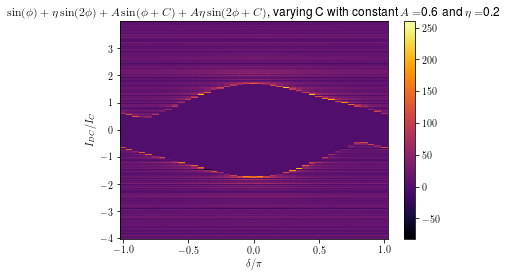

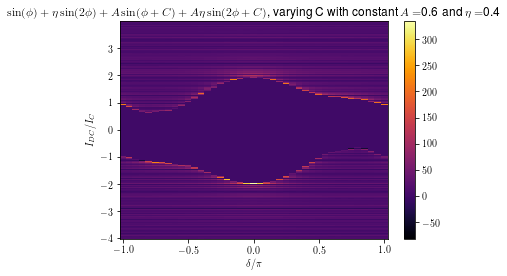

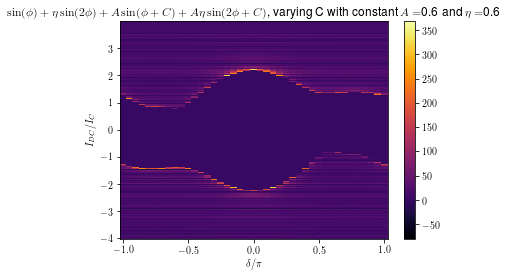

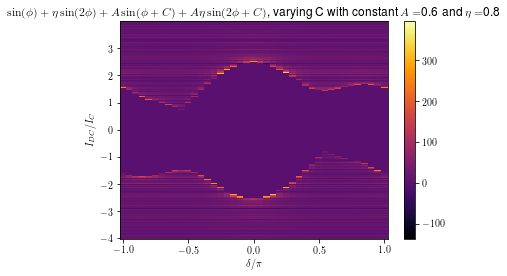

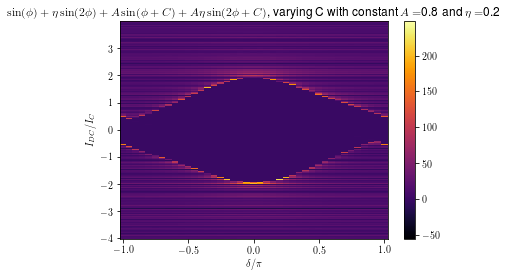

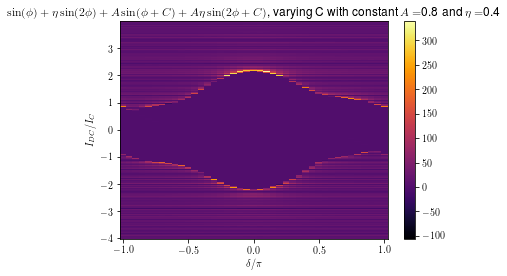

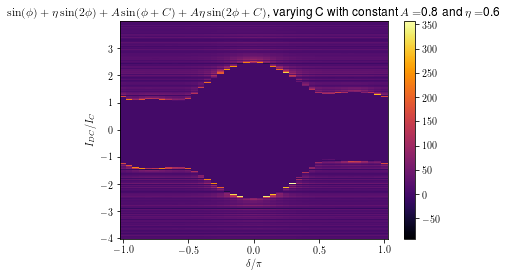

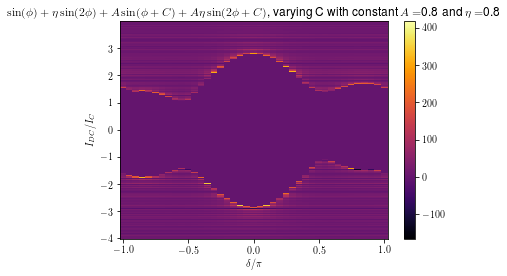

In [16]:
plt.figure()
for i in range(0,len(eta)):
    plt.pcolor(C/np.pi,IDC/Ic,np.squeeze(np.transpose(DVDI[:,:,i])),cmap='inferno',linewidth=0,rasterized=True,shading='auto')
    plt.xlabel("$\delta/\pi$")
    plt.ylabel("$I_{DC}/I_C$")
    plt.colorbar()

    plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A[i])+" and $\eta=$"+str(eta[i]))
    plt.show()
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")


## Compare $I_{C+}$, $I_{C-}$, asymmetry, and peak heights

### Plot peak heights vs C, grouped by the same A

In [68]:
colors = plt.cm.gnuplot(np.linspace(0,1,5))

In [77]:
eta_A_indx=3 # (A=0.2,eta=0.8)
#eta_A_indx=-1 # (A=0.8,eta=0.8)


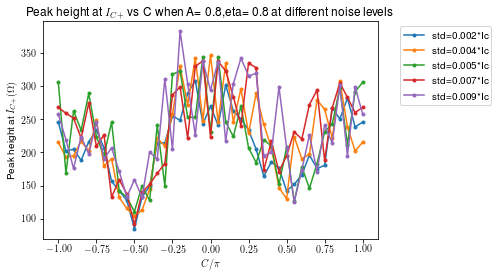

In [123]:
plt.figure()
#cindx=0
for j in range(0,len(noise_std)):
    plt.plot(C/np.pi,np.squeeze(peak_p[:,eta_A_indx,j]),'.-',label='std='+str(noise_std[j])+"*Ic")#,color=colors[cindx])
    #cindx=cindx+1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Peak height at $I_{C+}$ vs C when A= '+str(A[eta_A_indx])+',eta= '+str(eta[eta_A_indx])+' at different noise levels')
plt.xlabel('$C/\pi$')
plt.ylabel('Peak height at $I_{C+}(\Omega)$')
plt.show()


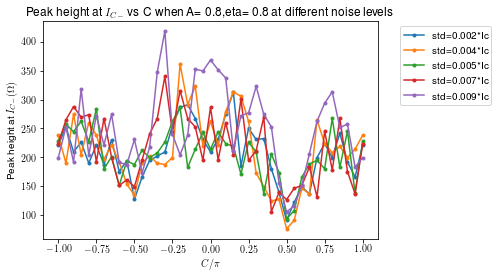

In [122]:
plt.figure()
#cindx=0
for j in range(0,len(noise_std)):
    plt.plot(C/np.pi,np.squeeze(peak_n[:,eta_A_indx,j]),'.-',label='std='+str(noise_std[j])+"*Ic")#,color=colors[cindx])
    #cindx=cindx+1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Peak height at $I_{C-}$ vs C when A= '+str(A[eta_A_indx])+',eta= '+str(eta[eta_A_indx])+' at different noise levels')
plt.xlabel('$C/\pi$')
plt.ylabel('Peak height at $I_{C-}(\Omega)$')
plt.show()


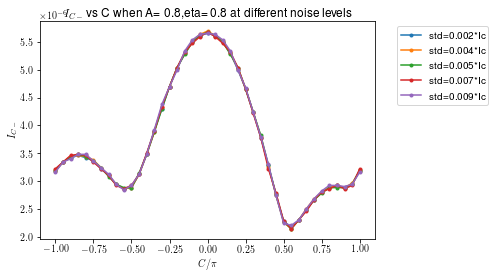

In [121]:
plt.figure()
#cindx=0
for j in range(0,len(noise_std)):
    plt.plot(C/np.pi,np.squeeze(Icn[:,eta_A_indx,j]),'.-',label='std='+str(noise_std[j])+"*Ic")#,color=colors[cindx])
    #cindx=cindx+1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('$I_{C-}$ vs C when A= '+str(A[eta_A_indx])+',eta= '+str(eta[eta_A_indx])+' at different noise levels')
plt.xlabel('$C/\pi$')
plt.ylabel('$I_{C-}$')
plt.show()


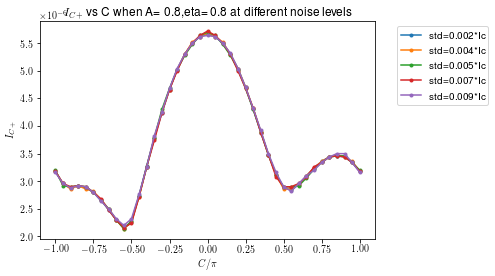

In [119]:
plt.figure()
#cindx=0
for j in range(0,len(noise_std)):
    plt.plot(C/np.pi,np.squeeze(Icp[:,eta_A_indx,j]),'.-',label='std='+str(noise_std[j])+"*Ic")#,color=colors[cindx])
    #cindx=cindx+1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('$I_{C+}$ vs C when A= '+str(A[eta_A_indx])+',eta= '+str(eta[eta_A_indx])+' at different noise levels')
plt.xlabel('$C/\pi$')
plt.ylabel('$I_{C+}$')
plt.show()

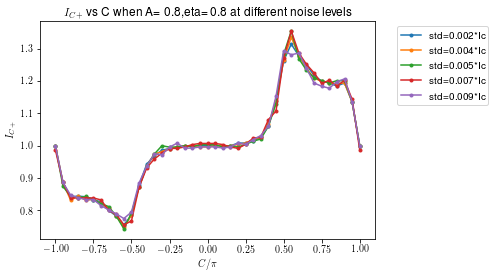

In [118]:
plt.figure()
#cindx=0
for j in range(0,len(noise_std)):
    plt.plot(C/np.pi,np.squeeze(Icp[:,eta_A_indx,j])/np.squeeze(Icn[:,eta_A_indx,j]),'.-',label='std='+str(noise_std[j])+"*Ic")#,color=colors[cindx])
    #cindx=cindx+1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('$I_{C+}$ vs C when A= '+str(A[eta_A_indx])+',eta= '+str(eta[eta_A_indx])+' at different noise levels')
plt.xlabel('$C/\pi$')
plt.ylabel('$I_{C+}$')
plt.show()

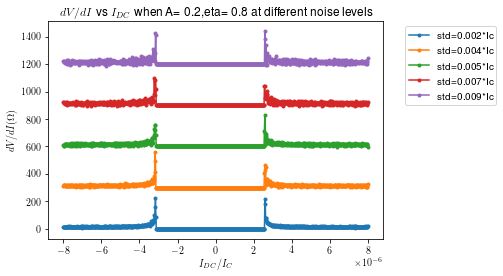

In [116]:
plt.figure()
C_idx=6
eta_A_indx=3
for j in range(0,len(noise_std)):
    plt.plot(IDC,np.squeeze(DVDI[C_idx,:,eta_A_indx,j])+j*300,'.-',label='std='+str(noise_std[j])+"*Ic")#,color=colors[cindx])
    #cindx=cindx+1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('$dV/dI$ vs $I_{DC}$ when A= '+str(A[eta_A_indx])+',eta= '+str(eta[eta_A_indx])+' at different noise levels')
plt.xlabel('$I_{DC}/I_C$')
plt.ylabel('$dV/dI(\Omega)$')
plt.show()


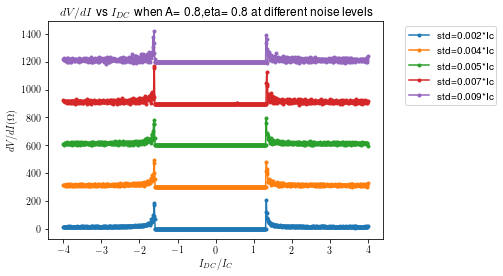

In [117]:
plt.figure()
C_idx=6
eta_A_indx=-1
for j in range(0,len(noise_std)):
    plt.plot(IDC/Ic,np.squeeze(DVDI[C_idx,:,eta_A_indx,j])+j*300,'.-',label='std='+str(noise_std[j])+"*Ic")#,color=colors[cindx])
    #cindx=cindx+1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('$dV/dI$ vs $I_{DC}$ when A= '+str(A[eta_A_indx])+',eta= '+str(eta[eta_A_indx])+' at different noise levels')
plt.xlabel('$I_{DC}/I_C$')
plt.ylabel('$dV/dI(\Omega)$')
plt.show()


In [93]:
DVDI.shape

(41, 800, 16, 5)

In [89]:
C[6]/np.pi

-0.6999999999959081

### Load experimental data

In [45]:
exp_data=loadmat("dense_sweeps_27mK_0mT.mat")

In [46]:
list(exp_data.keys())

['__header__',
 '__version__',
 '__globals__',
 'dense27mK0mTnp',
 'dense27mK0mTpn']

In [47]:
Sweep_np=exp_data['dense27mK0mTnp'][...]
print(Sweep_np.shape)
Sweep_pn=exp_data['dense27mK0mTpn'][...]
print(Sweep_pn.shape)

(2001, 2)
(2001, 2)


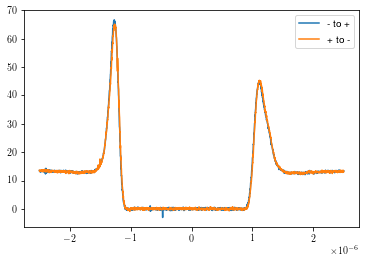

In [48]:
plt.figure()
plt.plot(Sweep_np[:,0],Sweep_np[:,1],label="- to +")
plt.plot(Sweep_pn[:,0],Sweep_pn[:,1],label="+ to -")
plt.legend()
plt.show()

In [49]:
from scipy.signal import find_peaks

In [53]:
Index,Height =find_peaks(Sweep_np[:,1],distance=600,height=2)
print(Index)
print(Height)
Index,Height =find_peaks(Sweep_pn[:,1],distance=600,height=2)
print(Index)
print(Height)

[ 492 1449]
{'peak_heights': array([66.6718804, 44.9880164])}
[ 554 1506]
{'peak_heights': array([45.327406, 65.164264])}


In [40]:
peak_n_exp=66
peak_p_exp=45
peak_ratio_exp=peak_n_exp/peak_p_exp
print(peak_ratio_exp)

1.4666666666666666


### Plot peak heights vs C, grouped by the same eta

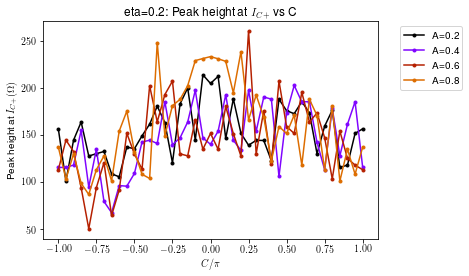

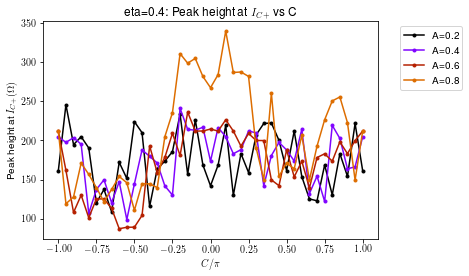

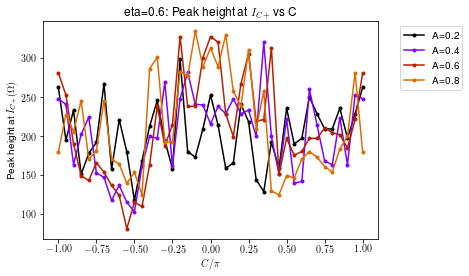

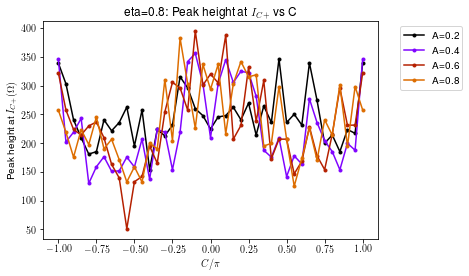

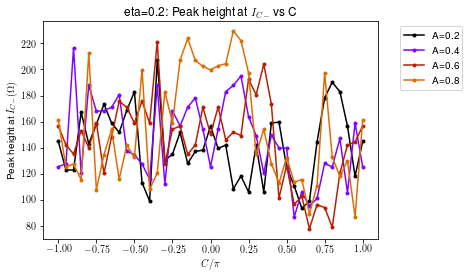

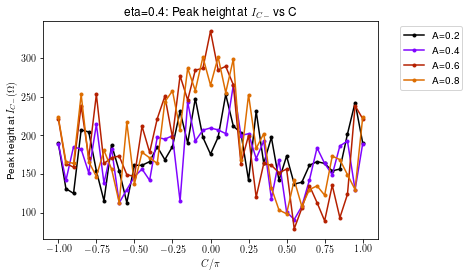

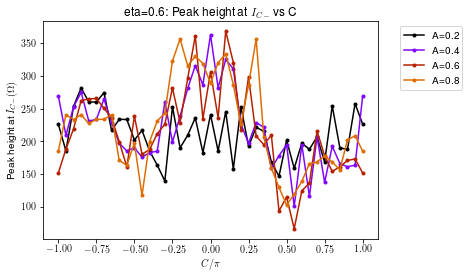

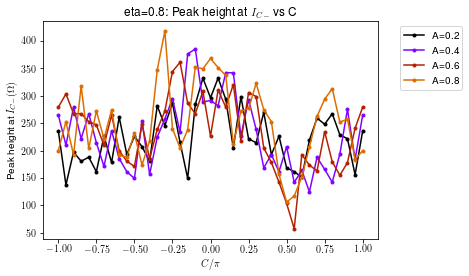

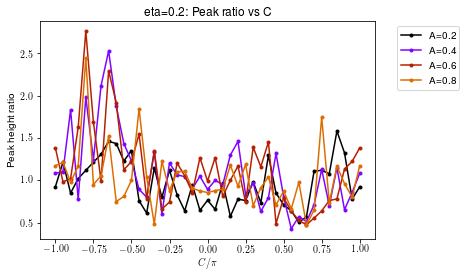

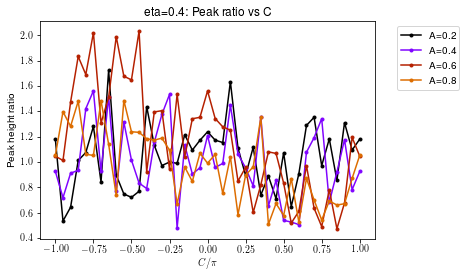

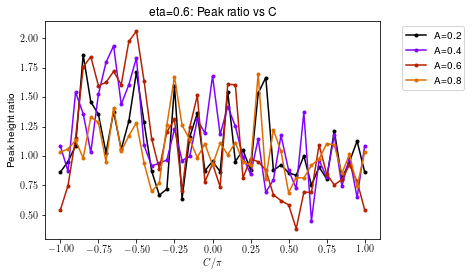

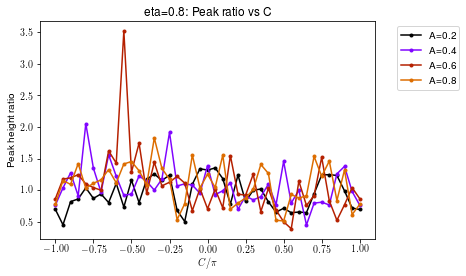

In [29]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,peak_p[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak height at $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C+}(\Omega)$')
    plt.show()

for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,peak_n[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak height at $I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C-}(\Omega)$')
    plt.show()

for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,peak_n[:,i]/peak_p[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak ratio vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height ratio')
    plt.show()

### Asymmetry

In [25]:
asymm_exp=np.ones(len(C))*0.83

### Asymmetry vs C, grouped by the same A

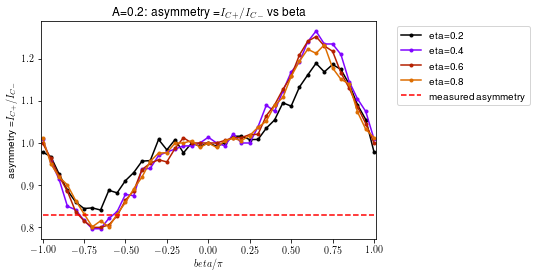

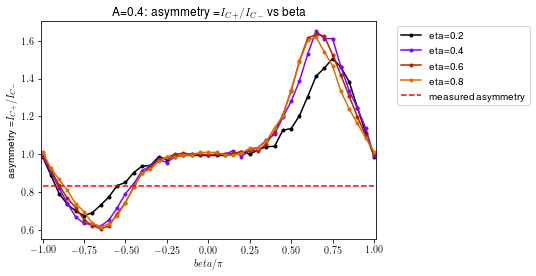

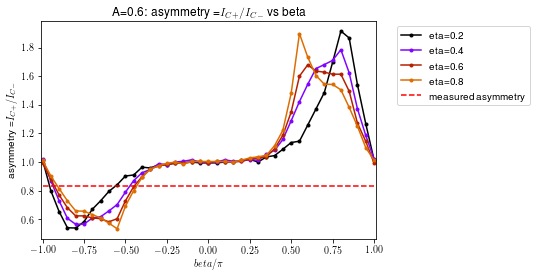

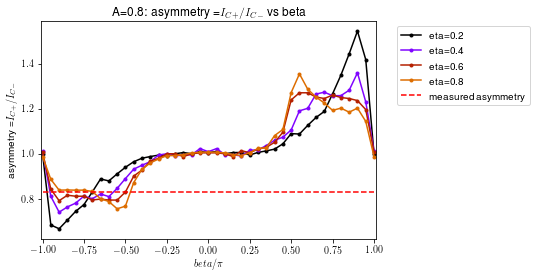

In [26]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,asymmetry[:,i],'.-',label='eta='+str(eta[i]),color=colors[cindx])
        cindx=cindx+1
    plt.plot(C/np.pi,asymm_exp,'r--',label="measured asymmetry")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("A="+str(A[0+j*size_A])+": asymmetry =$I_{C+}/I_{C-}$ vs beta")
    plt.xlim([-1.01,1.01])
    plt.xlabel("$beta/\pi$")
    plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
    plt.show()

### Asymmetry vs C, grouped by the same eta

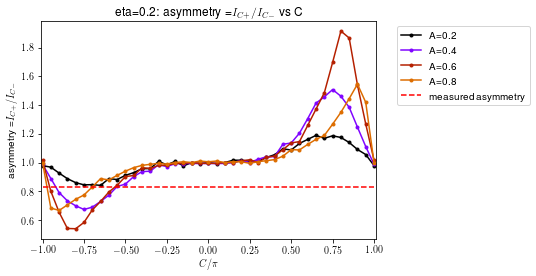

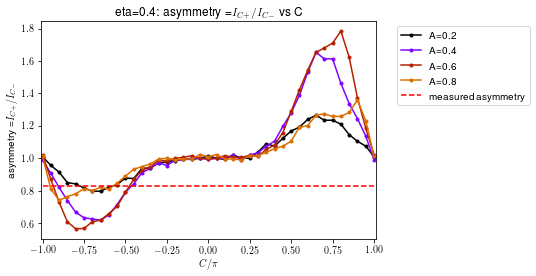

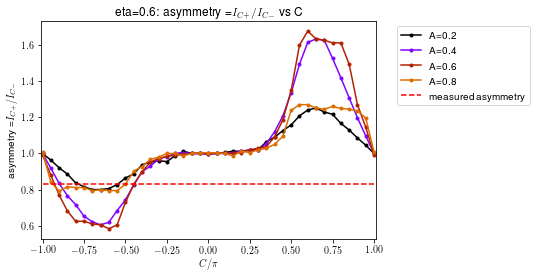

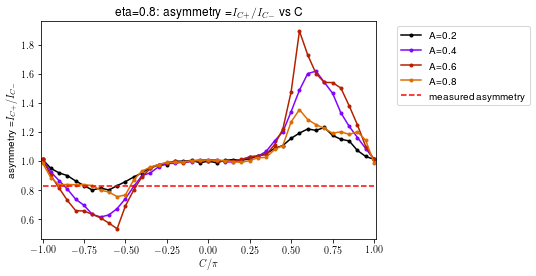

In [27]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,asymmetry[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1
    plt.plot(C/np.pi,asymm_exp,'r--',label="measured asymmetry")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': asymmetry =$I_{C+}/I_{C-}$ vs C')
    plt.xlim([-1.01,1.01])
    plt.xlabel('$C/\pi$')
    plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
    plt.show()

### $I_{C+}$ vs C, grouped by the same A

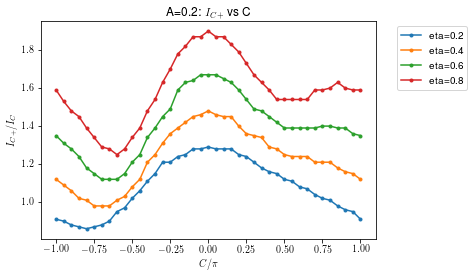

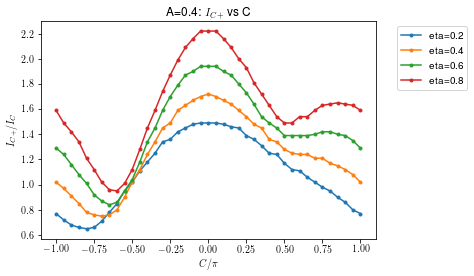

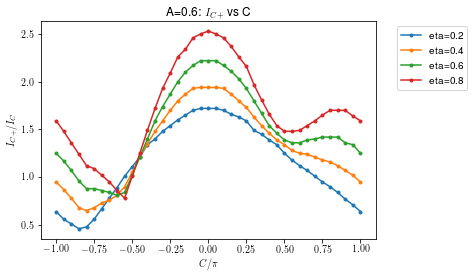

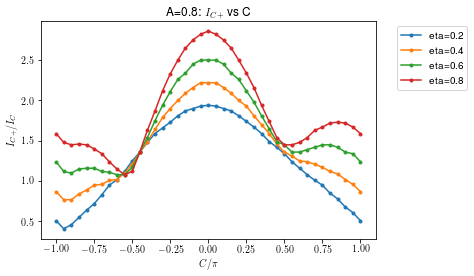

In [28]:
for j in range(0,size_A):
    plt.figure()
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,Icp[:,i]/Ic,'.-',label='eta='+str(eta[i]))
    plt.title('A='+str(A[0+j*size_A])+': $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('$I_{C+}/I_C$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### $I_{C-}$ vs C, grouped by the same A


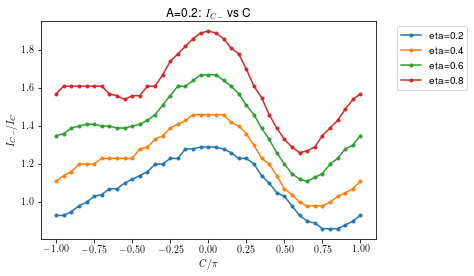

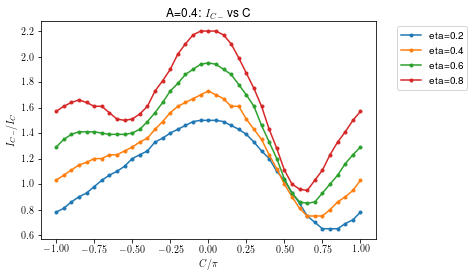

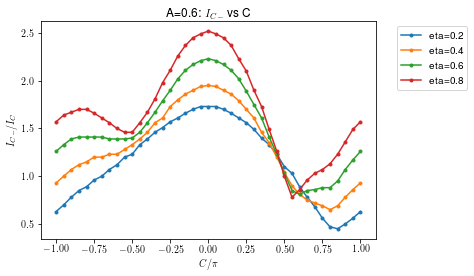

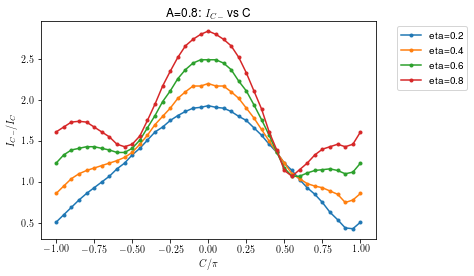

In [29]:
for j in range(0,size_A):
    plt.figure()
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,Icn[:,i]/Ic,'.-',label='eta='+str(eta[i]))
    plt.title('A='+str(A[0+j*size_A])+': $I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('$I_{C-}/I_C$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Save it into a .csv file

In [74]:
np.savetxt("./eta0p7_A0p5/csv/IDC.csv", IDC, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/C.csv", C, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/V.csv", V, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/DVDI.csv", DVDI, delimiter=",")
